# Best Advertisement Predictor

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

#Importing dataset
dataset = pd.read_csv('Ads_Optimisation.csv')

In [ ]:
#Visualise the first few entries of the data
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


###Using UCB Algorithm

We will use Reinforcement Learning to select the best advertisement out of a pool of options. <br/><br/>

<b>Multi-armed Bandit Problem</b> - <br/>We have 'd' arms, e.g., arms are the ads that we display to the user, each time they connect to the webpage. Each time a user connects to this webpage, that makes a round. At each round 'n', we will choose one ad to display to the user. At each round 'n', ad number 'i' gives reward ri(n)=0 or 1. The reward is 0 when user does not interact with the ad and 1 when the user does. Our goal is to maximize the total reward. <br/><br/>

<b>Upper Confidence Bound</b>- <br/>
<b>Step 1</b> : At each round 'n', we consider two numbers for each ad 'i'. Ni(n) is the number of times the ad 'i' was selected upto round 'n'. Ri(n) is the sum of reward of the ad 'i' upto round 'n'.
<br/>
<b>Step 2</b>: The average reward of ad 'i' upto round 'n', that is, <i>ri.bar(n)=Ri(n)/Ni(n)</i>
<br/>
<b>Step 3</b>: Confidence Interval is given by <i>[\ ri.bar(n) - delta.i(n), ri.bar(n)+delta.i(n) ]</i>, where delta.i(n) is given by <i>sqrt((3/2)*ln(n)/Ni(n))</i>
<br/>
<b>Step 4</b>: Select ad 'i' which has maximum upper confidence bound.



In [ ]:
N=1000
d=10
ads_selected = []
number_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0

for n in range(N):
  ad = 0
  max_upper_bound = 0
  for i in range(d):
    if number_of_selections[i] > 0:
      average_reward = sum_of_rewards[i]/number_of_selections[i]
      delta_i = math.sqrt((3/2)*math.log(n+1)/number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad]+1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad] = sum_of_rewards[ad]+reward
  total_reward = total_reward+reward

Text(0, 0.5, 'No. of times each ad was selected')

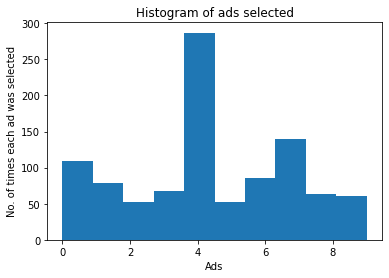

In [ ]:
#Visualise the results
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No. of times each ad was selected")

###Thompson Sampling (Using Bayesian Inference)

In this method, ad 'i' gets reward 'y' from a Bernoulli(theta.i) Distribution. The parameter theta.i is unknown but we set its uncertainty by assuming it has uniform distribution.

In [ ]:
N = 1000
d = 10
ads_selected = []
number_of_rewards1 = [0]*d
number_of_rewards0 = [0]*d
total_reward = 0

for n in range(N):
  ad = 0
  max_random = 0
  for i in range(d):
    random_beta = random.betavariate(number_of_rewards1[i] + 1, number_of_rewards0[i]+1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward==1:
    number_of_rewards1[ad] = number_of_rewards1[ad]+1
  else:
    number_of_rewards0[ad] = number_of_rewards0[ad]+1
  total_reward = total_reward + reward


Text(0, 0.5, 'No. of times the ad was selected')

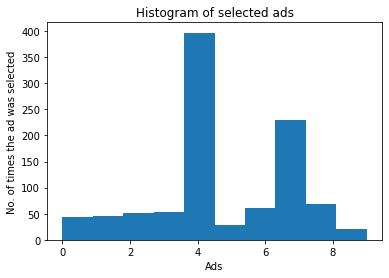

In [ ]:
#Visualise the results
plt.hist(ads_selected)
plt.title("Histogram of selected ads")
plt.xlabel("Ads")
plt.ylabel("No. of times the ad was selected")

###Difference between UCB and Thompson Sampling

<b>UCB</b>
<ol>
<li>Deterministic</li>
<li>Requires update at every round</li>
</ol>

<b>Thompson Sampling</b>
<ol>
<li>Probabilistic</li>
<li>Can accomodate delayed feedback</li>
<li>Better empirical evidence</li>
</ol>
